In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import minmax_scale



A middle set (randomly sample 20000 samples from the original data)

In [3]:
import matplotlib.pyplot as plt
df=pd.read_csv("fine_tuned_prediction_15k_model_all_train.csv")

([<matplotlib.axis.XTick at 0x7f0a02f81360>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

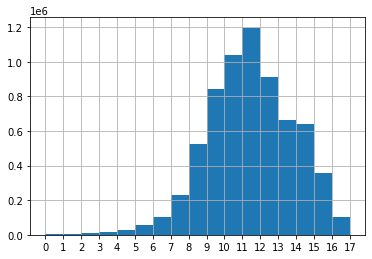

In [16]:
import matplotlib.pyplot as plt
df['Exp'].hist(bins=range(0,18))
plt.xticks(range(0,18))

In [6]:
df_sample_bin18_15k=pd.DataFrame()

In [23]:
import pandas as pd
import numpy as np




cnt=0
for i in range(0,17):
    low=i
    high=i+1
    df_low=df[df['Exp']>low]
    df_high_low=df_low[df_low['Exp']<high]
    print(low,high)
    print(len(df_high_low))
    print("median", np.median(df_high_low['Exp']))
    print(df_high_low['Exp'].describe())
    if (len(df_high_low)<15000):
        df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low)
    else:
        df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))
        
    


0 1
1877
median 0.0801017981840825
count    1877.000000
mean        0.169530
std         0.213873
min         0.000387
25%         0.029599
50%         0.080102
75%         0.220420
max         0.997579
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low)


1 2
3264
median 1.14576764699893
count    3264.000000
mean        1.249812
std         0.259748
min         1.000367
25%         1.047991
50%         1.145768
75%         1.392044
max         1.997782
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low)


2 3
7149
median 2.21182970028112
count    7149.000000
mean        2.308395
std         0.275179
min         2.000513
25%         2.079743
50%         2.211830
75%         2.490101
max         2.999659
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low)


3 4
13925
median 3.31417760349718
count    13925.000000
mean         3.375130
std          0.282391
min          3.000097
25%          3.127647
50%          3.314178
75%          3.587690
max          3.999871
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low)


4 5
26241
median 4.38435300854996
count    26241.000000
mean         4.423740
std          0.285930
min          4.000109
25%          4.169467
50%          4.384353
75%          4.655694
max          4.999950
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


5 6
46619
median 5.41459107921767
count    46619.000000
mean         5.443882
std          0.282820
min          5.000055
25%          5.196182
50%          5.414591
75%          5.676912
max          5.999908
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


6 7
86554
median 6.44107005032451
count    86554.000000
mean         6.464833
std          0.279927
min          6.000021
25%          6.220462
50%          6.441070
75%          6.693872
max          6.999985
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


7 8
173801
median 7.49046473960909
count    173801.000000
mean          7.494130
std           0.276398
min           7.000067
25%           7.258354
50%           7.490465
75%           7.726856
max           7.999996
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


8 9
351155
median 8.51283874000955
count    351155.000000
mean          8.509681
std           0.274119
min           8.000027
25%           8.279590
50%           8.512839
75%           8.750230
max           8.999997
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


9 10
511184
median 9.489982066767606
count    511184.000000
mean          9.492466
std           0.275768
min           9.000000
25%           9.249634
50%           9.489982
75%           9.721041
max           9.999999
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


10 11
542984
median 10.4631049626387
count    542984.000000
mean         10.461646
std           0.271902
min          10.000012
25%          10.223313
50%          10.463105
75%          10.686398
max          10.999989
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


11 12
341055
median 11.5741851276938
count    341055.000000
mean         11.545059
std           0.296564
min          11.000026
25%          11.285210
50%          11.574185
75%          11.811588
max          11.999986
Name: Exp, dtype: float64
12 13
274112
median 12.5737864173715
count    274112.000000
mean         12.543452
std           0.298082
min          12.000021
25%          12.280720
50%          12.573786
75%          12.808663
max          12.999988
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))
/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


13 14
227625
median 13.5730166418405
count    227625.000000
mean         13.549305
std           0.294318
min          13.000009
25%          13.296273
50%          13.573017
75%          13.814009
max          13.999997
Name: Exp, dtype: float64
14 15
168954
median 14.6259014175986
count    168954.000000
mean         14.583626
std           0.287072
min          14.000018
25%          14.350052
50%          14.625901
75%          14.839219
max          14.999742
Name: Exp, dtype: float64
15 16
66980
median 15.72891212397085
count    66980.000000
mean        15.651871
std          0.283326
min         15.000027
25%         15.447934
50%         15.728912
75%         15.898839
max         15.999982
Name: Exp, dtype: float64


/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))
/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))
/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))
/tmp/ipykernel_128041/2862939557.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample_bin18_15k=df_sample_bin18_15k.append(df_high_low.sample(15000))


16 17
17791
median 16.8279555691945
count    17791.000000
mean        16.729205
std          0.265476
min         16.000928
25%         16.583090
50%         16.827956
75%         16.941112
max         16.999523
Name: Exp, dtype: float64


([<matplotlib.axis.XTick at 0x7f0a0308dea0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

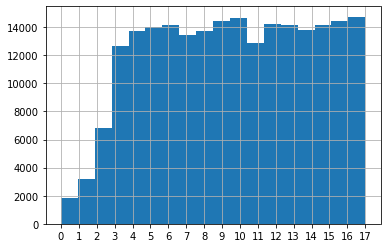

In [ ]:
df_sample_bin18_15k.columns=['Index','Seq','Pred','Exp','Residual']

In [ ]:
df_sample_bin18_15k.to_csv("df_sample_bin18_15k.csv")

In [ ]:
import pandas as pd
df=pd.read_csv("full_train_prediction_r2_50.csv")

In [ ]:
df['pred_error']=df['Predicted_Exp']-df['Actual_Exp']

In [ ]:
df['pred_error'].plot.hist()

In [ ]:
df_high_error=df[abs(df['pred_error'])>5]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Make the plot
plt.hexbin(df_high_error['pred_error'], df_high_error['Actual_Exp'], gridsize=(10,10),cmap="viridis" )
plt.colorbar()
plt.xlabel("Pred_Error")
plt.ylabel("Actual")
plt.savefig("hex_r50_fulltrain.png")
plt.show()



In [ ]:
df['scaled_exp'].plot.hist(bins=20)
plt.figure()
df_sampled['scaled_exp'].plot.hist(bins=20)

In [ ]:
df_sampled.to_csv("50k_4bins_scaled_train.csv",index=False)